In [1]:
#Fastai imports --> they include a lot of the things we need
%load_ext autoreload
%autoreload 2
%matplotlib inline
import sys
sys.path.append('/Users/chuanxu/fastai')
from fastai.imports import *
from fastai.structured import *
from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display
from sklearn import metrics
import holidays
import geocoder
import torch
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss

In [2]:
streets_latlng = {'11th Street': [37.7724134, -122.4147158],
 '17th Street': [37.787458, -122.4020796],
 '23rd Street': [37.7542073, -122.4126306],
 '25th Street': [37.7509423, -122.4133835],
 '26th Street': [37.7493609, -122.4129731],
 '6th Street': [37.7755771, -122.4019497],
 '7th Street': [37.7730614, -122.4032337],
 'Alice B. Toklas Place': [37.7852547, -122.4211281],
 "Angelo's Alley": [37.787458, -122.4020796],
 'Annie Street': [37.787458, -122.4020796],
 'Antonio Street': [37.7821992, -122.4132137],
 'Austin Street': [37.7887461, -122.4237179],
 'Bartlett Street': [37.752512, -122.4196056],
 'Battery Street': [37.7974664, -122.4008365],
 'Bonita Street': [37.787458, -122.4020796],
 'Broadway': [37.7959394, -122.4218895],
 'Bryant Street': [37.787458, -122.4020796],
 'Bush Street': [37.7883998, -122.4226917],
 'California Street': [37.7875445, -122.4449271],
 'Capp Street': [37.7571095, -122.4178321],
 'Cedar Street': [37.7863753, -122.4198512],
 'Chatham Place': [37.787458, -122.4020796],
 'Clay Street': [37.7913539, -122.4292951],
 'Colin Place': [37.7874202, -122.4131149],
 'Columbus Avenue': [37.8011696, -122.4115107],
 'Commercial Street': [37.787458, -122.4020796],
 'Daniel Burnham Court': [37.7867744, -122.4224906],
 'Dr Carlton P Goodlett Place': [37.77938580000001, -122.4184416],
 'Dr Tom Waddell Place': [37.7778871, -122.4189392],
 'Eddy Street': [37.787458, -122.4020796],
 'Ellis Street': [37.783497, -122.4236492],
 'Elm Street': [37.78121, -122.4081349],
 'Fell Street': [37.7743006, -122.4359699],
 'Fern Street': [37.7880201, -122.4219536],
 'Fulton Street': [37.7738326, -122.4625448],
 'Geary Boulevard': [37.781461, -122.4561109],
 'Geary Street': [37.781461, -122.4561109],
 'Golden Gate Avenue': [37.7792586, -122.4344434],
 'Green Street': [37.7977399, -122.4229493],
 'Grove Street': [37.7765716, -122.433057],
 'Halleck Street': [37.8030103, -122.4544055],
 'Hardie Place': [37.787458, -122.4020796],
 'Hayes Street': [37.7753224, -122.4353348],
 'Hemlock Street': [37.7871072, -122.421611],
 'Hotaling Street': [37.7960514, -122.4028479],
 'Hyde Street': [37.787458, -122.4020796],
 'Jackson Street': [37.7933175, -122.4280068],
 'Jessie Street': [37.7807423, -122.4101181],
 'Jones Street': [37.7945714, -122.414764],
 'Julia Street': [37.777837, -122.4121538],
 'Kearny Street': [37.79755919999999, -122.4054381],
 'Larkin Street': [37.7919467, -122.4192925],
 'Leavenworth Street': [37.7943595, -122.4164059],
 'Maiden Lane': [37.787458, -122.4020796],
 'Mariposa Street': [37.7636256, -122.4005317],
 'Mason Street': [37.787458, -122.4020796],
 'McAllister Street': [37.7782213, -122.4350777],
 'Meacham Place': [37.7870417, -122.4169846],
 'Merchant Street': [37.7950714, -122.4032526],
 'Mission Street': [37.787458, -122.4020796],
 'Montgomery Street': [37.787458, -122.4020796],
 'Myrtle Street': [37.7854391, -122.419668],
 'New Montgomery Street': [37.7874561, -122.4005234],
 'Nottingham Place': [37.7975938, -122.4051599],
 "O'Farrell Street": [37.7845559, -122.4228608],
 'Olive Street': [37.7844067, -122.4202625],
 'Pacific Avenue': [37.7945098, -122.4257137],
 'Parking Entrance Lane': [37.7827964, -122.4059254],
 'Pine Street': [37.7894225, -122.4220832],
 'Polk Street': [37.7914361, -122.4208795],
 'Post Street': [37.7863214, -122.4241385],
 'Powell Street': [37.796504, -122.4100932],
 'Redwood Street': [37.7803021, -122.4225317],
 'Sansome Street': [37.7979131, -122.4021425],
 'South Van Ness Avenue': [37.7917022, -122.4226899],
 'Stockton Street': [37.7967103, -122.4084529],
 'Stockton Tunnel': [37.7915624, -122.4074199],
 'Sutter Street': [37.7873556, -122.4234272],
 'Taylor Street': [37.7956513, -122.4132947],
 'Turk Street': [37.7813498, -122.4255309],
 'Union Street': [37.798571, -122.4239269],
 'Valencia Street': [37.7590188, -122.4213455],
 'Vallejo Street': [37.787458, -122.4020796],
 'Van Ness Avenue': [37.7917022, -122.4226899],
 'Verdi Place': [37.7922235, -122.3983974],
 'Washington Street': [37.7939891, -122.4156965],
 'Willow Street': [37.78315500000001, -122.4225854]}

In [3]:
data = pd.read_csv('data/train-parking.csv')
data['id'] = [i+1 for i in range(data.shape[0])]
test = pd.read_csv('data/test-no-labels-with-id.csv')

data = data.rename(index=str, columns = {'Real.Spots':'Real_Spots', 'Street.Length':'Street_Length'})
test = test.rename(index=str, columns = {'Real.Spots':'Real_Spots', 'Street.Length':'Street_Length'})

### get some features

In [4]:
def change_street_latlng(data, col):
    df = data.copy()
    col_lat = '%s_lat' % col
    col_lng = '%s_lng' % col
    df[col_lat] = df[col].map(lambda x:streets_latlng[x][0])
    df[col_lng] = df[col].map(lambda x:streets_latlng[x][1])
    return df

In [5]:
def get_date_features(df):
    us_holidays = holidays.US()
    df['datetime'] = pd.to_datetime(df['Date'], format = '%m/%d/%Y')
    df['weekday'] = df['datetime'].dt.weekday
    df['holidays'] = df['datetime'].map(lambda x:int(x in us_holidays))
    
    df['daytime'] = pd.to_datetime(df['Time'], format = '%H:%M')
    df['hour'] = df['daytime'].dt.hour
    return df

In [6]:
street_cols = ['Street', 'From', 'To']
time_columns = ['Date', 'Time', 'datetime', 'daytime', 'hour', 'weekday', 'holidays']
time_i_dont_want = ['Date', 'Time', 'datetime', 'daytime']

In [7]:
for col in street_cols:
    data = change_street_latlng(data, col)
    test = change_street_latlng(test, col)

In [8]:
data = get_date_features(data)
test = get_date_features(test)

In [9]:
data.transpose()

,0,1,2,3,4,5,6,7,8,9,...,1090,1091,1092,1093,1094,1095,1096,1097,1098,1099
Street,Mission Street,Polk Street,Van Ness Avenue,Van Ness Avenue,Van Ness Avenue,Larkin Street,Pine Street,Pine Street,Larkin Street,Van Ness Avenue,...,Polk Street,Polk Street,Van Ness Avenue,Van Ness Avenue,Van Ness Avenue,Van Ness Avenue,Larkin Street,Larkin Street,Leavenworth Street,Leavenworth Street
From,25th Street,Ellis Street,Geary Boulevard,Bush Street,Daniel Burnham Court,Cedar Street,Larkin Street,Polk Street,Myrtle Street,Van Ness Avenue,...,Grove Street,Grove Street,Van Ness Avenue,Golden Gate Avenue,Van Ness Avenue,Van Ness Avenue,Sutter Street,Sutter Street,Turk Street,Turk Street
To,26th Street,Olive Street,Myrtle Street,Fern Street,Post Street,Post Street,Polk Street,Van Ness Avenue,Geary Street,Bush Street,...,Dr Tom Waddell Place,Dr Tom Waddell Place,Fell Street,Van Ness Avenue,Golden Gate Avenue,Bush Street,Larkin Street,Larkin Street,Eddy Street,Eddy Street
Date,1/7/2014,1/18/2014,1/18/2014,1/18/2014,1/18/2014,1/18/2014,1/18/2014,1/18/2014,1/18/2014,1/18/2014,...,3/28/2014,3/28/2014,3/28/2014,3/28/2014,3/28/2014,3/28/2014,3/28/2014,3/28/2014,3/28/2014,3/28/2014
Time,16:19,20:42,20:39,20:38,20:38,20:20,20:21,20:22,20:20,20:37,...,20:00,20:33,21:35,21:33,21:28,21:24,19:27,21:44,19:10,21:56
Real_Spots,4,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,5,3
Street_Length,179.133,52.7402,52.5178,52.4053,52.1912,52.3242,146.417,139.494,52.1883,39.028,...,58.041,58.041,40.6716,63.262,44.8157,39.028,48.5558,48.5558,104.83,104.83
any_spot,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
id,1,2,3,4,5,6,7,8,9,10,...,1091,1092,1093,1094,1095,1096,1097,1098,1099,1100
Street_lat,37.7875,37.7914,37.7917,37.7917,37.7917,37.7919,37.7894,37.7894,37.7919,37.7917,...,37.7914,37.7914,37.7917,37.7917,37.7917,37.7917,37.7919,37.7919,37.7944,37.7944


### split train, val

In [10]:
#get the second row in each group
val_id = sorted(data.groupby(['Street', 'From', 'To']).nth(2).id.tolist())

In [11]:
train = data[~data['id'].isin(val_id)]
val = data[data['id'].isin(val_id)]

In [12]:
train.shape, val.shape, data.shape, test.shape

((1005, 20), (95, 20), (1100, 20), (726, 18))

### mean_encoding

In [13]:
def mean_encoding_test(test, train, col):
    """ Computes target enconding for test data.
    
    This is similar to how we do validation
    """
    new_col = '%s_RS_mean' % col
    m = train.groupby(col).Real_Spots.mean()
    train[new_col] = train[col].map(m)
    test[new_col] = test[col].map(m)
    return test, train

In [14]:
%%time 
mean_encoding_cols = ['Street', 'weekday', 'hour']

for c in mean_encoding_cols:
    val, train = mean_encoding_test(val, train, c)
    test, data = mean_encoding_test(test, data, c)

/Users/chuanxu/anaconda/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/chuanxu/anaconda/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


CPU times: user 397 ms, sys: 5.08 ms, total: 403 ms
Wall time: 400 ms


holiday matters

### take care of 23:00 which only appears in test

In [15]:
m = dict(data.groupby('hour').Real_Spots.mean())

In [16]:
m

{7: 1.9841269841269842,
 8: 1.7777777777777777,
 9: 2.8103448275862069,
 10: 0.96875,
 11: 0.58064516129032262,
 12: 0.60606060606060608,
 13: 1.9702970297029703,
 14: 1.1100917431192661,
 15: 2.6288659793814433,
 16: 1.5510204081632653,
 17: 5.9672131147540988,
 18: 1.292929292929293,
 19: 1.118279569892473,
 20: 1.0,
 21: 0.65934065934065933,
 22: 0.40000000000000002}

In [17]:
m[23] = 0.4

In [18]:
m

{7: 1.9841269841269842,
 8: 1.7777777777777777,
 9: 2.8103448275862069,
 10: 0.96875,
 11: 0.58064516129032262,
 12: 0.60606060606060608,
 13: 1.9702970297029703,
 14: 1.1100917431192661,
 15: 2.6288659793814433,
 16: 1.5510204081632653,
 17: 5.9672131147540988,
 18: 1.292929292929293,
 19: 1.118279569892473,
 20: 1.0,
 21: 0.65934065934065933,
 22: 0.40000000000000002,
 23: 0.4}

In [19]:
test['hour_RS_mean'] = test['hour'].map(m)

# Model 1

### get X, y on train, val set

In [20]:
street_cols = ['Street', 'From', 'To']
time_columns = ['Date', 'Time', 'datetime', 'daytime', 'hour', 'weekday', 'holidays']
time_i_dont_want = ['Date', 'Time', 'datetime', 'daytime']

to_drop = street_cols + time_i_dont_want + ['id']
to_drop_on_data = to_drop + ['Real_Spots']

In [21]:
X_train, y_train = train.drop(to_drop_on_data + ['any_spot'], axis = 1), train.any_spot
X_val, y_val = val.drop(to_drop_on_data + ['any_spot'], axis = 1), val.any_spot
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((1005, 13), (95, 13), (1005,), (95,))

### tune hyperparameters

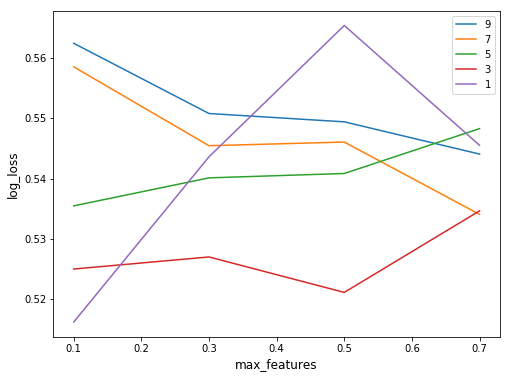

CPU times: user 2.34 s, sys: 560 ms, total: 2.9 s
Wall time: 5.26 s


In [22]:
%%time
max_features=[0.1, 0.3, 0.5, 0.7]
min_samples_leaf= [9, 7, 5, 3, 1]

plt.figure(figsize=(8,6))

mylist = []
for j in min_samples_leaf:
    x = []
    for i in max_features:
        clf = RandomForestClassifier(n_jobs=-1, n_estimators=50, max_features=i, min_samples_leaf=j)
        clf.fit(X_train, y_train)
        dic = {'max_features':i, 'min_samples_leaf':j, 'log_loss':log_loss(y_val, clf.predict_proba(X_val)[:,1])}
        mylist.append(dic)
        x.append(dic['log_loss'])
    plt.plot(max_features,x, label=str(j))

plt.xlabel('max_features', fontsize=12)
plt.ylabel('log_loss', fontsize=12)
plt.legend(loc='best')
plt.show()

In [23]:
pd.DataFrame(mylist, columns=['max_features', 'min_samples_leaf', 'log_loss']).sort_values('log_loss')

,max_features,min_samples_leaf,log_loss
16,0.1,1,0.516172
14,0.5,3,0.521083
12,0.1,3,0.524967
13,0.3,3,0.526969
7,0.7,7,0.534041
15,0.7,3,0.534628
8,0.1,5,0.535454
9,0.3,5,0.540107
10,0.5,5,0.540833
17,0.3,1,0.543608


### fit the final data

In [24]:
X, y = data.drop(to_drop_on_data + ['any_spot'], axis = 1), data.any_spot
X_test = test.drop(to_drop, axis = 1)
X.shape, X_test.shape, y.shape

((1100, 13), (726, 13), (1100,))

In [36]:
%%time
clf = RandomForestClassifier(n_jobs=-1, n_estimators=50, max_features=0.1, min_samples_leaf=1)
clf.fit(X, y)

CPU times: user 86 ms, sys: 33 ms, total: 119 ms
Wall time: 146 ms


In [37]:
pred = clf.predict(X_test)

In [38]:
pd.DataFrame({'id':test.id, 'any_spot':pred}, columns=['id','any_spot']).to_csv('preds/pred4.csv', index=False)

In [ ]:
#pd.DataFrame({'id':test.id, 'any_spot':pred}, columns=['id','any_spot']).to_csv('preds/pred4.csv', index=False)
#
#log_loss(y_val, clf.predict_proba(X_val)[:,1])
#0.2203037432414105

In [ ]:
#pd.DataFrame({'id':test.id, 'any_spot':pred}, columns=['id','any_spot']).to_csv('preds/pred3.csv', index=False)
#
#log_loss(y_val, clf.predict_proba(X_val)[:,1])
#0.34818608071223228

In [34]:
#pd.DataFrame({'id':test.id, 'any_spot':pred}, columns=['id','any_spot']).to_csv('preds/pred1.csv', index=False)
#0.49815
#log_loss(y_val, clf.predict_proba(X_val)[:,1])
#0.41012218081600849

### featuer importance

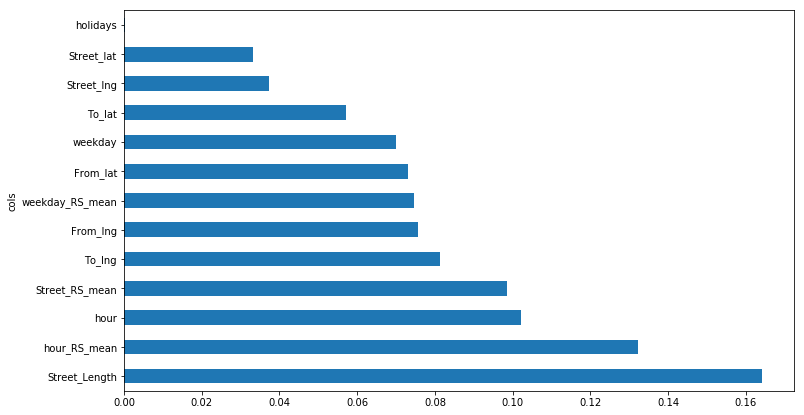

In [29]:
fi = rf_feat_importance(clf, X)
fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

In [30]:
fi

,cols,imp
0,Street_Length,0.164125
12,hour_RS_mean,0.132253
9,hour,0.102151
10,Street_RS_mean,0.098661
6,To_lng,0.081435
4,From_lng,0.075718
11,weekday_RS_mean,0.074571
3,From_lat,0.072949
7,weekday,0.069946
5,To_lat,0.057203


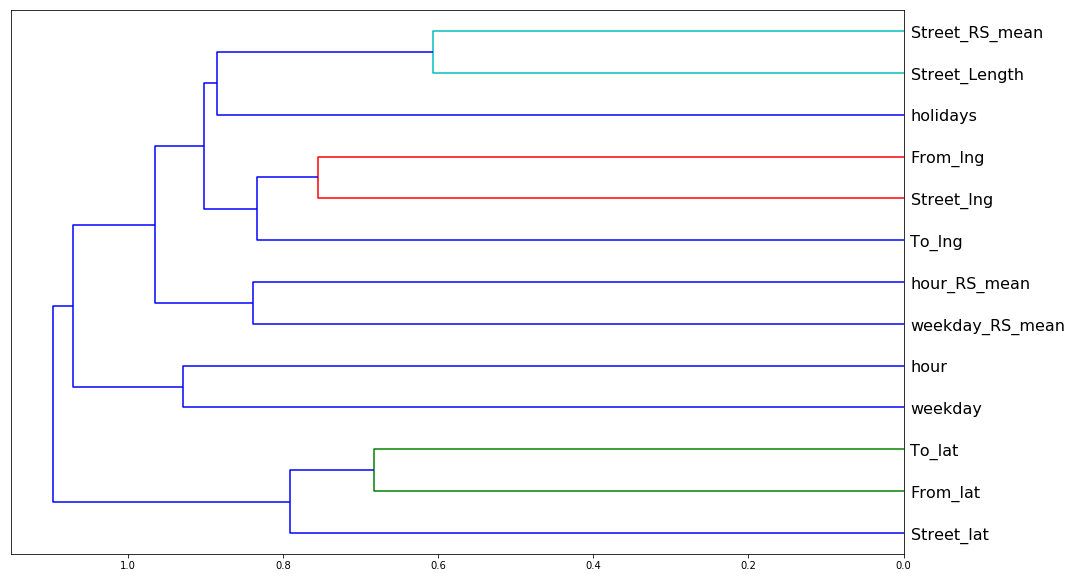

In [31]:
from scipy.cluster import hierarchy as hc
corr = np.round(scipy.stats.spearmanr(X).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=X.columns, orientation='left', leaf_font_size=16)
plt.show()

# Model 2

In [48]:
street_cols = ['Street', 'From', 'To']
time_columns = ['Date', 'Time', 'datetime', 'daytime', 'hour', 'weekday', 'holidays']
time_i_dont_want = ['Date', 'Time', 'datetime', 'daytime']
unimportant = ['holidays', 'Street_lng', 'Street_lat']

to_drop = street_cols + time_i_dont_want + unimportant +['id']
to_drop_on_data = to_drop + ['Real_Spots']

In [49]:
X_train, y_train = train.drop(to_drop_on_data + ['any_spot'], axis = 1), train.any_spot
X_val, y_val = val.drop(to_drop_on_data + ['any_spot'], axis = 1), val.any_spot
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((1005, 10), (95, 10), (1005,), (95,))

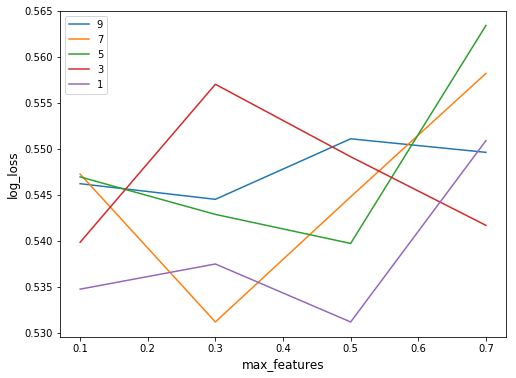

CPU times: user 2.36 s, sys: 598 ms, total: 2.96 s
Wall time: 5.16 s


In [50]:
%%time
max_features=[0.1, 0.3, 0.5, 0.7]
min_samples_leaf= [9, 7, 5, 3, 1]

plt.figure(figsize=(8,6))

mylist = []
for j in min_samples_leaf:
    x = []
    for i in max_features:
        clf = RandomForestClassifier(n_jobs=-1, n_estimators=50, max_features=i, min_samples_leaf=j)
        clf.fit(X_train, y_train)
        dic = {'max_features':i, 'min_samples_leaf':j, 'log_loss':log_loss(y_val, clf.predict_proba(X_val)[:,1])}
        mylist.append(dic)
        x.append(dic['log_loss'])
    plt.plot(max_features,x, label=str(j))

plt.xlabel('max_features', fontsize=12)
plt.ylabel('log_loss', fontsize=12)
plt.legend(loc='best')
plt.show()

In [51]:
pd.DataFrame(mylist, columns=['max_features', 'min_samples_leaf', 'log_loss']).sort_values('log_loss')

,max_features,min_samples_leaf,log_loss
18,0.5,1,0.531185
5,0.3,7,0.531188
16,0.1,1,0.534753
17,0.3,1,0.537489
10,0.5,5,0.539724
12,0.1,3,0.539847
15,0.7,3,0.541691
9,0.3,5,0.542881
1,0.3,9,0.544521
6,0.5,7,0.544794


In [52]:
X, y = data.drop(to_drop_on_data + ['any_spot'], axis = 1), data.any_spot
X_test = test.drop(to_drop, axis = 1)
X.shape, X_test.shape, y.shape

((1100, 10), (726, 10), (1100,))

In [53]:
%%time
clf = RandomForestClassifier(n_jobs=-1, n_estimators=50, max_features=0.5, min_samples_leaf=1)
clf.fit(X, y)

CPU times: user 119 ms, sys: 29.8 ms, total: 149 ms
Wall time: 146 ms


In [54]:
pred = clf.predict(X_test)

In [57]:
#pd.DataFrame({'id':test.id, 'any_spot':pred}, columns=['id','any_spot']).to_csv('preds/pred6.csv', index=False)
#
#log_loss(y_val, clf.predict_proba(X_val)[:,1])
#0.23065089205484532

In [47]:
#pd.DataFrame({'id':test.id, 'any_spot':pred}, columns=['id','any_spot']).to_csv('preds/pred5.csv', index=False)
#
#log_loss(y_val, clf.predict_proba(X_val)[:,1])
#0.2226574070165912

In [ ]:
#pd.DataFrame({'id':test.id, 'any_spot':pred}, columns=['id','any_spot']).to_csv('preds/pred2.csv', index=False)
#0.48109
#log_loss(y_val, clf.predict_proba(X_val)[:,1])
#0.41673949769920604

### check val set is good or not

In [58]:
kaggle_score = [0.49815, 0.48109]
log_loss_on_val = [0.41012218081600849, 0.41673949769920604]

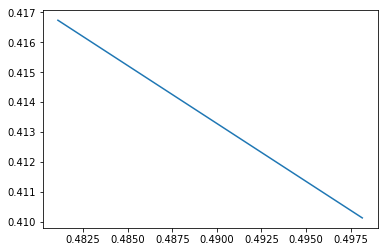

In [59]:
plt.plot(kaggle_score, log_loss_on_val)